In [4]:
#***********************************Fruits classification********************************************

#importing all the required libraries
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

In [5]:
#Defining model architecture
class Model:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))

        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
 
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
 
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))

        return model

In [7]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [8]:
#Preprocessing all the images in the dataset
from sklearn.preprocessing import LabelBinarizer
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (48, 48, 3)

print("loading images.....")
imagePaths = sorted(list(paths.list_images("fruits_dataset/dataset")))
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
encoder=LabelBinarizer()
labels=encoder.fit_transform(labels)
for(i,label) in enumerate(encoder.classes_):
    print("{} - {}".format(i+1,label))

loading images.....
1 - Apple Braeburn
2 - Apple Golden 1
3 - Apple Golden 2
4 - Apple Golden 3
5 - Apple Granny Smith
6 - Apple Red 1
7 - Apple Red 2
8 - Apple Red 3
9 - Apple Red Delicious
10 - Apple Red Yellow 1
11 - Apple Red Yellow 2
12 - Apricot
13 - Avocado
14 - Avocado ripe
15 - Banana
16 - Banana Lady Finger
17 - Banana Red
18 - Cactus fruit
19 - Cantaloupe 1
20 - Cantaloupe 2
21 - Carambula
22 - Cherry 1
23 - Cherry 2
24 - Cherry Rainier
25 - Cherry Wax Black
26 - Cherry Wax Red
27 - Cherry Wax Yellow
28 - Chestnut
29 - Clementine
30 - Cocos
31 - Dates
32 - Granadilla
33 - Grape Blue
34 - Grape Pink
35 - Grape White
36 - Grape White 2
37 - Grape White 3
38 - Grape White 4
39 - Grapefruit Pink
40 - Grapefruit White
41 - Guava
42 - Hazelnut
43 - Huckleberry
44 - Kaki
45 - Kiwi
46 - Kumquats
47 - Lemon
48 - Lemon Meyer
49 - Limes
50 - Lychee
51 - Mandarine
52 - Mango
53 - Mangostan
54 - Maracuja
55 - Melon Piel de Sapo
56 - Mulberry
57 - Nectarine
58 - Orange
59 - Papaya
60 - Pa

In [73]:
#Splitting the dataset into training and testing set
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.25,random_state=42)
aug=ImageDataGenerator(rotation_range=25,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")

In [74]:
#Compiling, training and saving the model to disk
print("compiling model............")
model = Model.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],depth=IMAGE_DIMS[2], classes=len(encoder.classes_))

opt = Adam(lr=INIT_LR, decay=INIT_LR / 10)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

print("training network.........")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY),steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)

print("saving model to disk......")
model.save("sample_model")

print("saving label binarizer to disk......")
f = open("labelbin", "wb")
f.write(pickle.dumps(encoder))
f.close()

compiling model............
training network.........
Epoch 1/10
1531/1531 [==============================] - 64s 42ms/step - loss: 0.0714 - acc: 0.9719 - val_loss: 0.0095 - val_acc: 0.9966
Epoch 2/10
1531/1531 [==============================] - 54s 35ms/step - loss: 0.0084 - acc: 0.9970 - val_loss: 0.0033 - val_acc: 0.9988
Epoch 3/10
1531/1531 [==============================] - 54s 35ms/step - loss: 0.0048 - acc: 0.9983 - val_loss: 0.0030 - val_acc: 0.9988
Epoch 4/10
1531/1531 [==============================] - 54s 35ms/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0015 - val_acc: 0.9995
Epoch 5/10
1531/1531 [==============================] - 53s 35ms/step - loss: 0.0026 - acc: 0.9991 - val_loss: 4.0930e-04 - val_acc: 0.9999
Epoch 6/10
1531/1531 [==============================] - 54s 35ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0014 - val_acc: 0.9994
Epoch 7/10
1531/1531 [==============================] - 54s 35ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0048 - val_ac

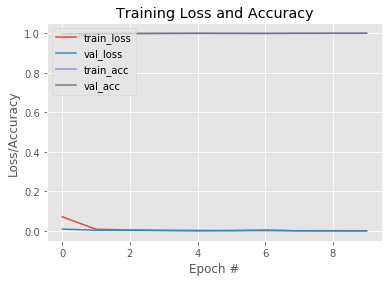

In [75]:
#Plotting a graph between Epochs and Loss/Accuracy
%matplotlib inline
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot")
plt.show()

In [22]:
print("Total number of images in the dataset:",len(data))
print("Total number of images in training set:",0.75*len(data))
print("Total number of images in testing set:",0.25*len(data))
print("Total number of fruit classes/labels:",len(encoder.classes_))

Total number of images in the dataset: 65325
Total number of images in training set: 48993.75
Total number of images in testing set: 16331.25
Total number of fruit classes/labels: 95


In [76]:
#Predicting the label for new image
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
import operator
from IPython.display import Image

print("loading model from disk........")
model = load_model("sample_model")
mlb = pickle.loads(open("labelbin", "rb").read())

loading model from disk........


In [77]:
#Function to classify new fruit
def classifyFruit(new_image):
    image = cv2.imread(new_image)
    output = imutils.resize(image, width=400)

    image = cv2.resize(image, (48, 48))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    print("classifying image....")
    proba = model.predict(image)[0]
    idxs = np.argsort(proba)[::-1][:2]

    dict={}
    for (label, p) in zip(mlb.classes_, proba):
        dict[label]=p
    print(max(dict.items(), key=operator.itemgetter(1))[0])

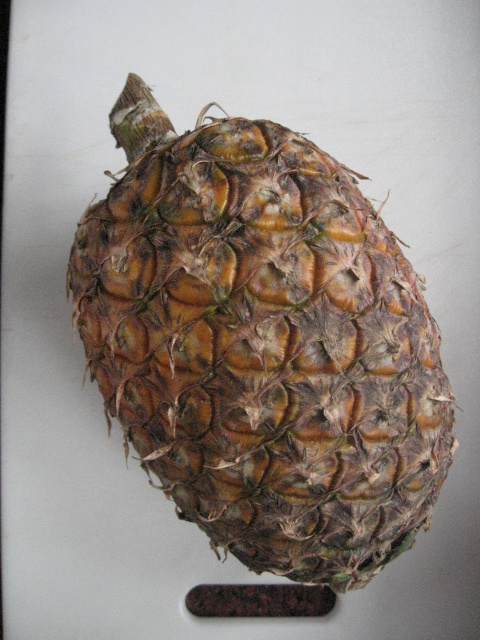

In [78]:
Image(filename='samples/sample_pineapple.jpg',width=140,height=140)

In [79]:
classifyFruit("samples/sample_pineapple.jpg")

classifying image....
Pineapple


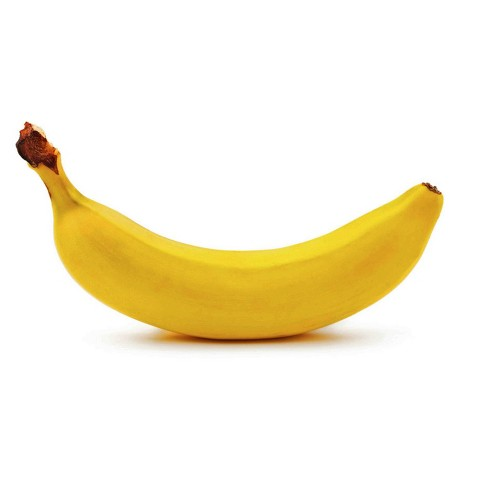

In [80]:
Image(filename='samples/sample_banana.jpg',width=140,height=140)

In [81]:
classifyFruit("samples/sample_banana.jpg")

classifying image....
Banana Lady Finger


In [14]:
#Using transfer learning. Here VGG16 model is used.
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Flatten

class vgg16Model:
    @staticmethod
    def build(width,height,depth,classes):
        vgg16_model = VGG16(input_shape = (width,height,depth), weights = None, include_top = False)
        model=Sequential()
        for layer in vgg16_model.layers:
            model.add(layer)
        model.add(Flatten())
        model.add(Dense(classes,activation="sigmoid"))
        return model
vgg16Model.build(48,48,3,95).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [15]:
#Training the model using VGG16 model
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from sklearn.preprocessing import LabelBinarizer
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (48, 48, 3)

print("loading images...")
imagePaths = sorted(list(paths.list_images("fruits_dataset/dataset")))
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("data matrix: {} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))
print(labels)
encoder=LabelBinarizer()
labels=encoder.fit_transform(labels)
print(labels)
for(i,label) in enumerate(encoder.classes_):print("{} - {}".format(i+1,label))

(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.25,random_state=42)
aug=ImageDataGenerator(rotation_range=25,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")

print("compiling model............")
model = vgg16Model.build(IMAGE_DIMS[0],IMAGE_DIMS[1],IMAGE_DIMS[2],classes=len(encoder.classes_))

opt = Adam(lr=INIT_LR, decay=INIT_LR / 10)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

print("training network.........")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY),steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)

print("serializing network......")
model.save("sample_vgg16model")

print("serializing label binarizer...")
f = open("vgg16modellabelbin", "wb")
f.write(pickle.dumps(encoder))
f.close()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/t

loading images...
data matrix: 65325 images (3527.55MB)
[['Tomato 1']
 ['Redcurrant']
 ['Huckleberry']
 ..., 
 ['Apple Golden 2']
 ['Apple Red Yellow 2']
 ['Peach Flat']]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
1 - Apple Braeburn
2 - Apple Golden 1
3 - Apple Golden 2
4 - Apple Golden 3
5 - Apple Granny Smith
6 - Apple Red 1
7 - Apple Red 2
8 - Apple Red 3
9 - Apple Red Delicious
10 - Apple Red Yellow 1
11 - Apple Red Yellow 2
12 - Apricot
13 - Avocado
14 - Avocado ripe
15 - Banana
16 - Banana Lady Finger
17 - Banana Red
18 - Cactus fruit
19 - Cantaloupe 1
20 - Cantaloupe 2
21 - Carambula
22 - Cherry 1
23 - Cherry 2
24 - Cherry Rainier
25 - Cherry Wax Black
26 - Cherry Wax Red
27 - Cherry Wax Yellow
28 - Chestnut
29 - Clementine
30 - Cocos
31 - Dates
32 - Granadilla
33 - Grape Blue
34 - Grape Pink
35 - Grape White
36 - Grape White 2
37 - Grape White 3
38 - Grape White 4
39 - Grapefruit Pink
40 - Grap

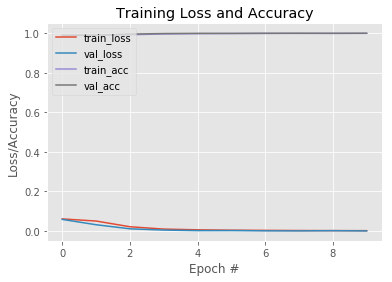

In [23]:
#Plotting a graph between Epochs and Loss/Accuracy
%matplotlib inline
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot")
plt.show()

In [47]:
print("loading model from disk........")
model = load_model("sample_vgg16model")
mlb = pickle.loads(open("labelbin", "rb").read())

loading model from disk........


In [48]:
#Function to classify new fruit
def classifyFruitUsingVggModel(new_image):
    image = cv2.imread(new_image)
    output = imutils.resize(image, width=400)

    image = cv2.resize(image, (48, 48))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    print("classifying image....")
    proba = model.predict(image)[0]
    idxs = np.argsort(proba)[::-1][:2]

    dict={}
    for (label, p) in zip(mlb.classes_, proba):
        dict[label]=p
    print(max(dict.items(), key=operator.itemgetter(1))[0])

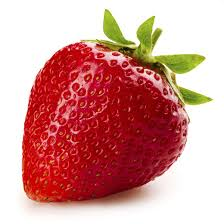

In [86]:
Image(filename='samples/sample_strawberry.jpg',width=140,height=140)

In [90]:
classifyFruitUsingVggModel("samples/sample_strawberry.jpg")

classifying image....
Strawberry


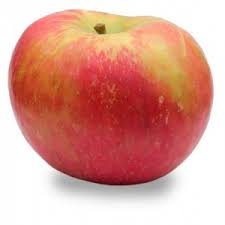

In [116]:
Image(filename='samples/sample_apple.jpg',width=140,height=140)

In [117]:
classifyFruitUsingVggModel("samples/sample_apple.jpg")

classifying image....
Apple Red Yellow 1


In [ ]:
Observations:

Accuracy was used as evaluation metrics since each fruit class contains almost equal number of images.
The accuracy of model(without transfer learning) and model(VGG16 model) are similar.
Graphs for both the models were plotted.
Graphs cleary show that validation accuracies of both the models are increasing with increase in epoches.
The model was able to classify new sample images accurately.